In [1]:
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from matplotlib import colormaps
%matplotlib widget

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
prefix = '/mnt/data5/spatial/data'
model = 'triplet-gi-0999.pt'
embeddings = []
idxs = []
lens = []
sections = [
    'colon/CD/A',
    'colon/CD/B',
    'colon/CD/C',
    'colon/CD/D',
]
for i, section in enumerate(sections):
    section_path = os.path.join(prefix, section, 'embeddings', model)
    embeddings.append(torch.load(section_path).numpy())
    lens.append(len(embeddings[i]))
    idxs.extend([i] * len(embeddings[i]))
embeddings = np.concatenate(embeddings, axis=0)

In [3]:
X = TSNE().fit_transform(embeddings)

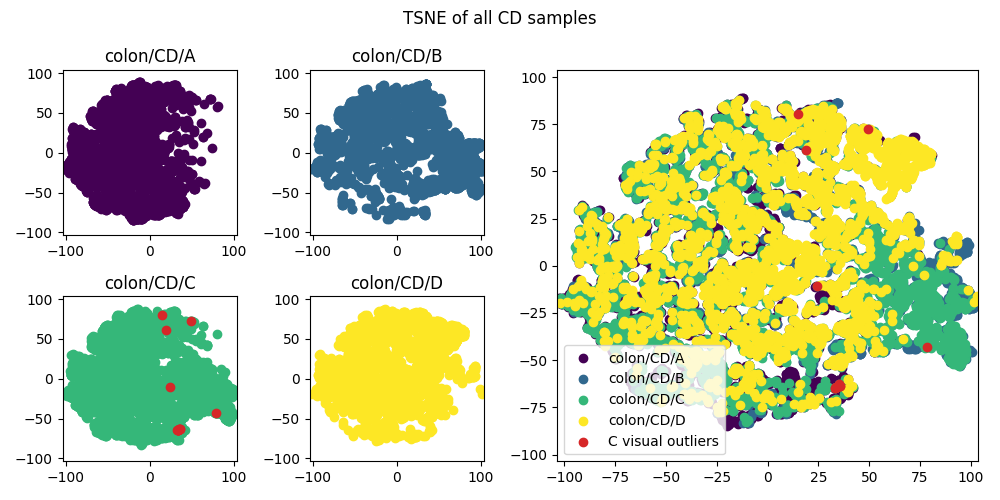

In [7]:
cmap = colormaps["viridis"]
cmap_interp = np.linspace(0, 1, len(sections))

fig, axs = plt.subplots(2, 4, figsize=(10,5))
gs = axs[0, 2].get_gridspec()
# remove the underlying axes
for ax in axs[:, 2:].flatten():
    ax.remove()
axbig = fig.add_subplot(gs[0:, 2:])
lim = X.max()
end = 0
for i in range(len(sections)):
    start = end
    end = start + lens[i]
    ax = axs[i // 2, i % 2]
    ax.scatter(X[start:end, 0], X[start:end, 1], color=cmap(cmap_interp[i]))
    axbig.scatter(X[start:end, 0], X[start:end, 1], color=cmap(cmap_interp[i]), label=sections[i])
    ax.set_xlim([-lim, lim])
    ax.set_ylim([-lim, lim])
    ax.set_title(sections[i])
axbig.set_xlim([-lim, lim])
axbig.set_ylim([-lim, lim])
axbig.legend()

fig.suptitle('TSNE of all CD samples')
fig.tight_layout()
plt.show()